In [1]:
import pandas as pd
import numpy as np
import os
import re
import shutil
import pickle
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime

In [2]:
data = pd.read_csv('final_data.csv')

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data[['text', 'polarity']], test_size=0.2)

print(f'Shape of train dataset: {train.shape}')
print(f'Shape of test dataset: {test.shape}')

Shape of train dataset: (2880000, 2)
Shape of test dataset: (720000, 2)


In [4]:
train['polarity'].value_counts()

0    1440610
1    1439390
Name: polarity, dtype: int64

In [5]:
test['polarity'].value_counts()

1    360610
0    359390
Name: polarity, dtype: int64

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [7]:
train_vector = vectorizer.fit_transform(train['text'].values)
test_vector = vectorizer.transform(test['text'].values)

In [8]:
train_vector.shape, test_vector.shape

((2880000, 556856), (720000, 556856))

In [20]:

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [9]:
train_y = train['polarity'].values
test_y = test['polarity'].values

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
svm = SGDClassifier(loss='hinge', n_jobs=-1)
logistic = SGDClassifier(loss='log', n_jobs=-1)
knn = KNeighborsClassifier(n_jobs=-1)

In [12]:
svm.fit(train_vector, train_y)

SGDClassifier(n_jobs=-1)

In [13]:
svm_y_hat = svm.predict(test_vector)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y, svm_y_hat)

0.8681611111111112

In [15]:
logistic.fit(train_vector, train_y)

SGDClassifier(loss='log', n_jobs=-1)

In [16]:
log_y_hat = logistic.predict(test_vector)
accuracy_score(test_y, log_y_hat)

0.8549166666666667

In [17]:
_ = svm.predict(test_vector)
test_y_hat = [1 if i>0.55 else 0 for i in _]

In [18]:
from tensorflow.math import confusion_matrix

conf_mat = confusion_matrix(test_y, test_y_hat, num_classes=2)

<AxesSubplot:>

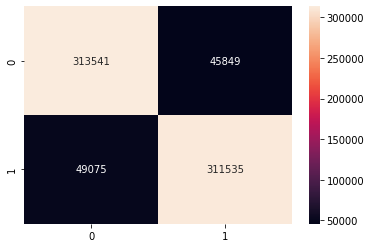

In [19]:
sns.heatmap(conf_mat, annot=True, fmt='d')

In [27]:
query = 'this product is as not good as expected'
query = vectorizer.transform([query])

In [28]:
svm.predict(query)

array([0], dtype=int64)

In [29]:

with open('svm_classifier.pkl', 'wb') as f:
    pickle.dump(svm, f)